## Sentiment Analysis Model

### Requirements

In [229]:
# !pip install tensorflow
# !pip install ipywidgets
# !pip install nltk
# !pip install transformers
# Link for automodels from tensorflow https://huggingface.co/transformers/v3.0.2/model_doc/auto.html
# !pip install matplotlib
# !pip install -U jupyter

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 10.3 MB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 3.4 MB/s eta 0:00:01


### Imports

In [368]:
from transformers import BertTokenizerFast, TFBertForSequenceClassification
from tensorflow.nn import softmax
from tensorflow.keras import Sequential, layers
import pandas as pd
import glob
from big_picture.get_merged_data import get_data
from big_picture import pre_processor
import numpy as np
from sklearn.preprocessing import MinMaxScaler

### Model and base example

In [351]:
tokenizer = BertTokenizerFast.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
model = TFBertForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some layers from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing TFBertForSequenceClassification: ['pre_classifier', 'dropout_19', 'distilbert']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english an

In [352]:
text = "Replace me by any text you'd like"
encoded_input = tokenizer(text, return_tensors='tf', max_length=500, padding=True, truncation=True)
encoded_input

{'input_ids': <tf.Tensor: shape=(1, 11), dtype=int32, numpy=
array([[ 101, 5672, 2033, 2011, 2151, 3793, 2017, 1005, 1040, 2066,  102]],
      dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(1, 11), dtype=int32, numpy=array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 11), dtype=int32, numpy=array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int32)>}

In [361]:
output1 = model(encoded_input)
output1

TFSequenceClassifierOutput(loss=None, logits=<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[-0.45756233,  0.66898453]], dtype=float32)>, hidden_states=None, attentions=None)

In [362]:
softmax(output1.logits)

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.24479891, 0.75520104]], dtype=float32)>

### Basic modelling of 150 rows from our data

In [383]:
REL_PATH_INPUT = "../raw_data/data_12k/"
CONTENT_COL = "content"
DESCRIPTION_COL = "short_description"
HEADLINE_COL = "headline"

NEWS_ALL_DATA = "news_all_data"

df =  get_data(REL_PATH_INPUT)
df = df.sample(15)
df[CONTENT_COL] = df[CONTENT_COL].replace('\n',' ', regex=True)

df[news_all_data] = df[CONTENT_COL] + " " + df[DESCRIPTION_COL] + " " + df[HEADLINE_COL]
df = df.dropna(subset=[news_all_data]).reset_index()
df = df[df[news_all_data] != "Invalid file"].reset_index(drop=True)

In [384]:
texts2 = list(df[NEWS_ALL_DATA])

In [365]:
encoded_input = tokenizer(texts, 
                          return_tensors='tf',
                          padding=True,
                          max_length=500,
                          truncation=True)
#encoded_input['input_ids']

In [366]:
output = model(encoded_input)

In [367]:
softmax(output.logits)

<tf.Tensor: shape=(150, 2), dtype=float32, numpy=
array([[0.23661183, 0.7633882 ],
       [0.28365955, 0.7163405 ],
       [0.23377003, 0.76623   ],
       [0.26159132, 0.7384086 ],
       [0.26350266, 0.7364974 ],
       [0.24486628, 0.7551337 ],
       [0.22863743, 0.77136254],
       [0.23555854, 0.76444143],
       [0.22856376, 0.7714362 ],
       [0.25988525, 0.74011475],
       [0.2367774 , 0.76322263],
       [0.2276648 , 0.77233523],
       [0.22217791, 0.7778221 ],
       [0.2524659 , 0.7475341 ],
       [0.20834151, 0.79165846],
       [0.23108649, 0.7689135 ],
       [0.23970367, 0.76029634],
       [0.22350265, 0.77649736],
       [0.2733278 , 0.72667223],
       [0.25113177, 0.74886817],
       [0.2264102 , 0.7735898 ],
       [0.24173339, 0.7582666 ],
       [0.23222469, 0.7677753 ],
       [0.24878559, 0.75121444],
       [0.21810828, 0.7818917 ],
       [0.24276899, 0.757231  ],
       [0.2732543 , 0.72674567],
       [0.22877453, 0.7712254 ],
       [0.22763379, 0.7723

In [369]:
my_array = softmax(output.logits).numpy()
df = pd.DataFrame(my_array, columns = ['Negative','Positive'])

In [370]:
df

,Negative,Positive
0,0.236612,0.763388
1,0.283660,0.716340
2,0.233770,0.766230
3,0.261591,0.738409
4,0.263503,0.736497
...,...,...
145,0.228285,0.771716
146,0.247305,0.752695
147,0.240447,0.759553
148,0.265487,0.734513


In [320]:
print(df['Negative'].mean())
print(df['Positive'].mean())

0.5823297
0.41767037


In [294]:
import matplotlib.pyplot as plt
#plt.hist(df['Negative']) # Check feature distribution
#plt.hist(df['Positive']) # Check feature distribution

In [296]:
df['Result'] = df['Positive'] - df['Negative']
df['Result']

0     -0.189840
1     -0.193959
2     -0.184332
3     -0.185883
4     -0.187027
         ...   
145   -0.194782
146   -0.191415
147   -0.189422
148   -0.191322
149   -0.193712
Name: Result, Length: 150, dtype: float32

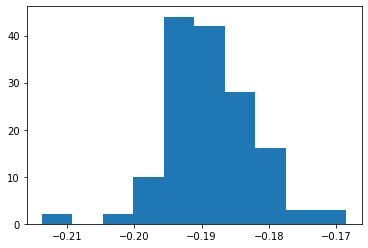

In [297]:
plt.hist(df['Result']); # Check feature distribution

In [305]:
#scaler = MinMaxScaler(feature_range=(-1, 1)) # Instanciate StandarScaler
#scaler.fit(df[['Result']]) # Fit scaler to data
#df['Scaled_Result'] = scaler.transform(df[['Result']]) # Use scaler to transform data

In [304]:
#plt.hist(scaled_df['Negative']) # Check feature distribution
#plt.hist(df['Scaled_Result']); # Check feature distribution